#**Archisha Sinha**
##Course: Deep Learning
##Title: ANN models with Regularizers (Lasso, Ridge, Dropout)

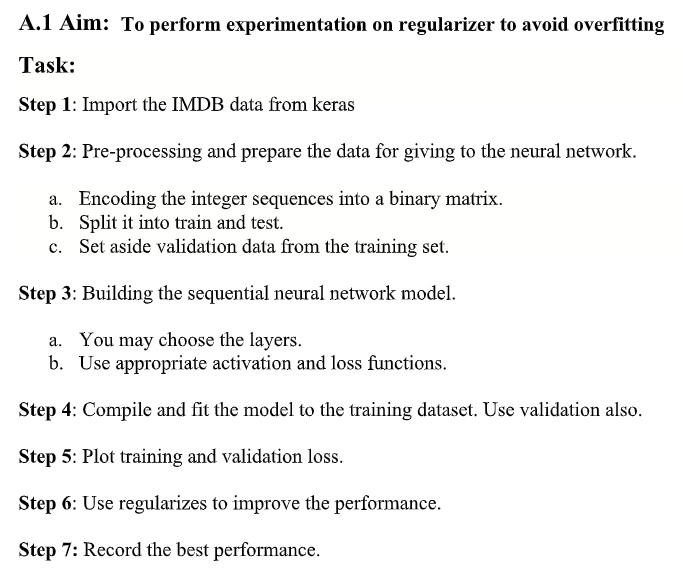

In [ ]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers,losses,metrics,regularizers

In [ ]:
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

1

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_data.shape

(25000,)

In [ ]:
test_data.shape

(25000,)

In [ ]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
def binary_matrix(data,dimension=10000):
  matrix=np.zeros((len(data), dimension))
  for review_number, word in enumerate(data):
    matrix[review_number, word]=1
  return matrix

In [ ]:
x_train=binary_matrix(train_data)
x_test=binary_matrix(test_data)

In [ ]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [ ]:
x_train=binary_matrix(train_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_test.shape

(25000, 10000)

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
y_test.shape

(25000,)

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [ ]:
partial_x_train.shape

(15000, 10000)

In [ ]:
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 10s 10ms/step - loss: 0.3432 - acc: 0.8572 - val_loss: 0.2787 - val_acc: 0.8884
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2000 - acc: 0.9233 - val_loss: 0.2971 - val_acc: 0.8853
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1484 - acc: 0.9463 - val_loss: 0.3642 - val_acc: 0.8762
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1093 - acc: 0.9617 - val_loss: 0.3732 - val_acc: 0.8783
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0766 - acc: 0.9746 - val_loss: 0.4246 - val_acc: 0.8767
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0507 - acc: 0.9835 - val_loss: 0.5503 - val_acc: 0.8733
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0309 - acc: 0.9909 - val_loss: 0.6330 - val_acc: 0.8733
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

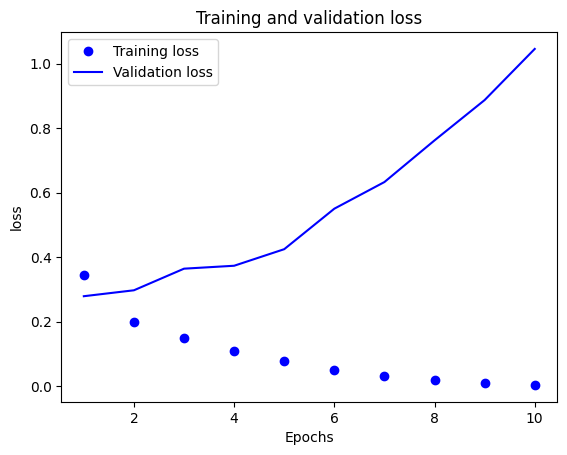

In [ ]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

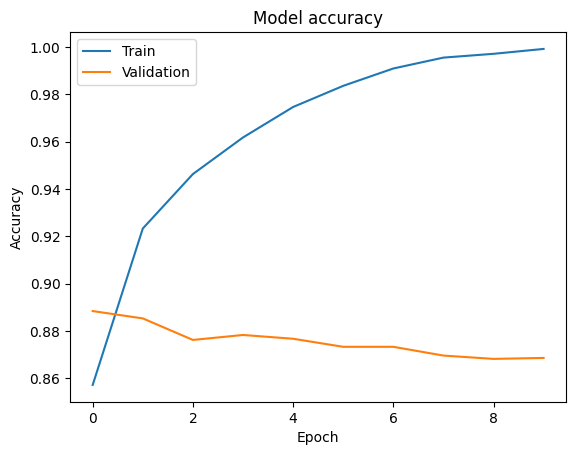

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
performance=model.evaluate(x_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 1.1435 - acc: 0.8549


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[1.7218811e-03],
       [1.0000000e+00],
       [9.9999654e-01],
       ...,
       [5.9956528e-04],
       [9.3123374e-05],
       [1.7889895e-01]], dtype=float32)

#Adding L2

LR 0.001

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.3949 - acc: 0.8552 - val_loss: 0.3291 - val_acc: 0.8806
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2853 - acc: 0.9045 - val_loss: 0.3310 - val_acc: 0.8828
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2681 - acc: 0.9121 - val_loss: 0.3440 - val_acc: 0.8770
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2600 - acc: 0.9144 - val_loss: 0.3566 - val_acc: 0.8757
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2570 - acc: 0.9134 - val_loss: 0.3435 - val_acc: 0.8799
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2512 - acc: 0.9178 - val_loss: 0.3462 - val_acc: 0.8779
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2482 - acc: 0.9180 - val_loss: 0.3455 - val_acc: 0.8765
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.

In [ ]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

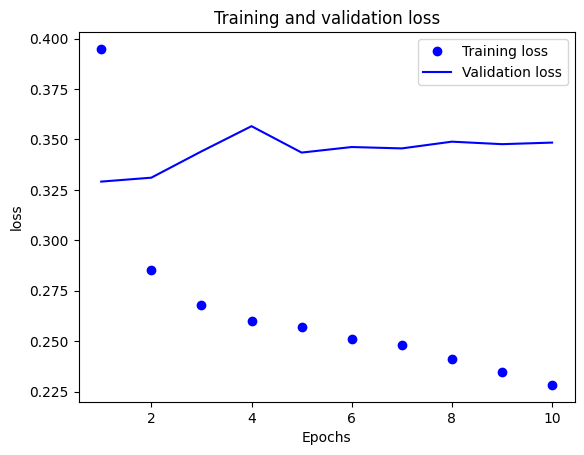

In [ ]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict1 = history1.history
loss_values = history_dict1['loss']
val_loss_values = history_dict1['val_loss']
acc = history_dict1['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

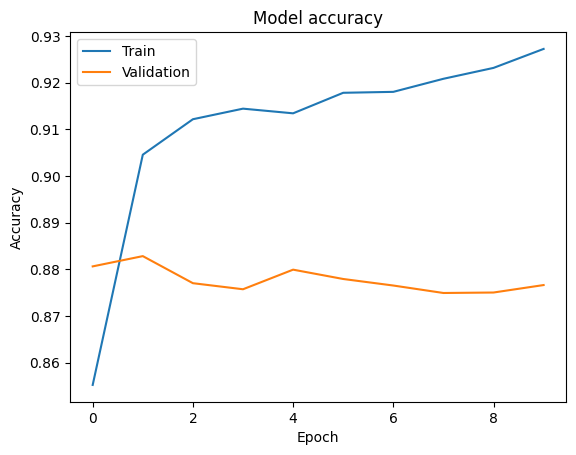

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()